# **Project Overview:**
This project focuses on Sentiment Analysis using the textual content from product reviews. The goal is to analyze user sentiments based on their written feedback, particularly focusing on the "reviewText" column in the dataset. Sentiment analysis allows us to classify and understand the emotions and opinions conveyed in the review text, such as whether the sentiment is positive, negative, or neutral.

## **Dataset Description:**
The dataset includes several fields that provide insights into product reviews, user information, and their helpfulness ratings. Below is a detailed description of the columns:

- **reviewerName:** The name of the reviewer.
- **overall:** The overall rating provided by the reviewer, ranging from 1 (worst) to 5 (best).
- **reviewText:** The actual text of the review, which is the main focus of this analysis. This column will be used for sentiment analysis.
- **reviewTime**: The date when the review was written.
- **day_diff:**The difference in days between the review date and the analysis date.
- **helpful_yes:** The number of helpful votes the review received.
- **helpful_no:** The number of non-helpful votes the review received.
- **total_vote:** The total number of votes the review received (helpful + non-helpful).
- **score_pos_neg_diff:** The difference between helpful votes and non-helpful votes.
- **score_average_rating:** The average rating calculated from helpful votes.
- **wilson_lower_bound:** The lower bound of the Wilson score confidence interval for a Bernoulli parameter, used to rank helpfulness of reviews.

The core focus will be on sentiment analysis using the "reviewText" column, where machine learning or natural language processing (NLP) techniques will be applied to classify the sentiment as positive, negative, or neutral.

In [3]:
from google.colab import files
uploaded  = files.upload()

Saving amazon.csv to amazon.csv


## **Import relevant libraries**

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("stopwords")
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob

%matplotlib inline

pd.set_option('display.max_columns',None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [189]:
raw_data = pd.read_csv("amazon.csv")

In [190]:
df= raw_data.copy()
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


## **Data Cleaning**

In [191]:
df.drop('Unnamed: 0',inplace =True,axis = 1)

In [192]:
df = df.sort_values('wilson_lower_bound',ascending = False)

In [193]:
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [194]:
df.isnull().sum()

,0
reviewerName,1
overall,0
reviewText,1
reviewTime,0
day_diff,0
helpful_yes,0
helpful_no,0
total_vote,0
score_pos_neg_diff,0
score_average_rating,0


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4915 entries, 2031 to 4914
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewerName          4914 non-null   object 
 1   overall               4915 non-null   int64  
 2   reviewText            4914 non-null   object 
 3   reviewTime            4915 non-null   object 
 4   day_diff              4915 non-null   int64  
 5   helpful_yes           4915 non-null   int64  
 6   helpful_no            4915 non-null   int64  
 7   total_vote            4915 non-null   int64  
 8   score_pos_neg_diff    4915 non-null   int64  
 9   score_average_rating  4915 non-null   float64
 10  wilson_lower_bound    4915 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 460.8+ KB


In [196]:
df.fillna("unknown")

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109
...,...,...,...,...,...,...,...,...,...,...,...
1712,G. Abbott,5,I use this in my Samsung Galaxy S5 to store my...,24-06-2014,167,0,0,0,0,0.000000,0.000000
1711,G68,5,awesome! Worked well with the Surface 2 tablet...,04-08-2014,126,0,0,0,0,0.000000,0.000000
1710,G0Horns!,4,Its amazing the amount of storage we are putti...,27-05-2013,560,0,0,0,0,0.000000,0.000000
1709,g0estoeleven,3,This card does exactly what it should. Class-...,08-03-2013,640,0,0,0,0,0.000000,0.000000


In [197]:
df.describe()

,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [198]:
df.duplicated().sum()

0

In [199]:
df["overall"].unique()

array([5, 1, 3, 4, 2])

In [200]:
def unique_values(cols,df):
  for col in cols:
    print(f" {col}: {df[col].nunique()}")


In [201]:
unique_values(df.columns,df)

 reviewerName: 4594
 overall: 5
 reviewText: 4912
 reviewTime: 690
 day_diff: 690
 helpful_yes: 23
 helpful_no: 17
 total_vote: 26
 score_pos_neg_diff: 27
 score_average_rating: 28
 wilson_lower_bound: 40


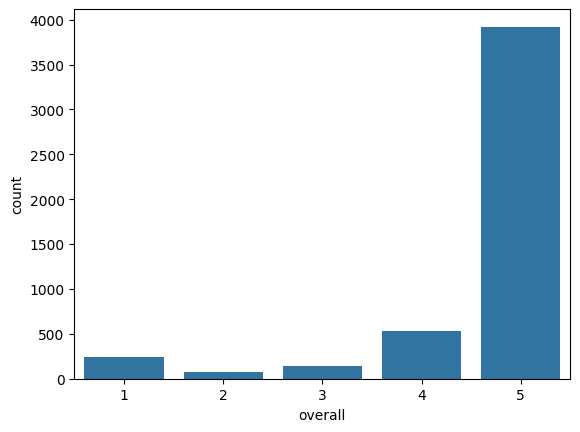

In [202]:
sns.countplot(x=df['overall'])
plt.show()

[]

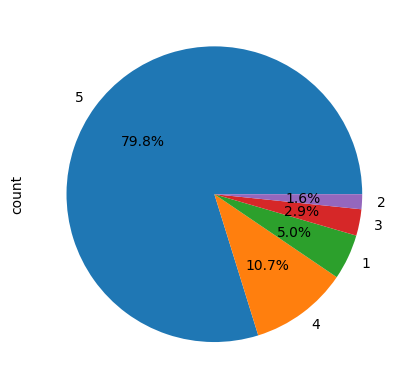

In [203]:
df['overall'].value_counts().plot(kind ='pie',autopct='%1.1f%%')
plt.plot()

## **Data Preprocessing**

In [204]:
## lowercase
## Tokenization
## Remove special characters and sometime need to remove digits
## Remove stopwords and puncctautions
## stemming

In [205]:
nltk.download('wordnet')
wnl = WordNetLemmatizer()
import string
def transform_data(text):
  text = re.sub(r'\d+', '', str(text))
  text = text.lower()   ## lowercse
  text  = nltk.word_tokenize(text)   ## Tokenization
  y = []
  for i in text:
    if i.isalnum():   ## Remove specials characters
      y.append(i)

  text = y[:]
  y.clear()           ## Remove stopwords and punctuation
  for i in text:
    if i not in set(stopwords.words('english')) and i not in string.punctuation :
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:     ## Lemmatization
     y.append(wnl.lemmatize(i,pos ='v'))

  return ' '.join(y)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [206]:
df['transform_reviewText'] = df['reviewText'].apply(transform_data)

In [207]:
df

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,transform_reviewText
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544,update lovely wife buy samsung galaxy tab fath...
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519,test dozens sdhc card one disturb trend notice...
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139,note please read last update scroll bottom lea...
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577,card get hot enough painful defective need con...
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109,sandisk announcement first gb micro sd take in...
...,...,...,...,...,...,...,...,...,...,...,...,...
1712,G. Abbott,5,I use this in my Samsung Galaxy S5 to store my...,24-06-2014,167,0,0,0,0,0.000000,0.000000,use samsung galaxy store photos videos data st...
1711,G68,5,awesome! Worked well with the Surface 2 tablet...,04-08-2014,126,0,0,0,0,0.000000,0.000000,awesome work well surface later return surface...
1710,G0Horns!,4,Its amazing the amount of storage we are putti...,27-05-2013,560,0,0,0,0,0.000000,0.000000,amaze amount storage put micro chip days use d...
1709,g0estoeleven,3,This card does exactly what it should. Class-...,08-03-2013,640,0,0,0,0,0.000000,0.000000,card exactly performance fair price microsd fo...


In [208]:
wc = WordCloud(width = 500,height = 500,min_font_size=14,background_color = 'white')

In [209]:
text = ' '.join(df['transform_reviewText'])

In [210]:
reviews_text_wc = wc.generate(text)

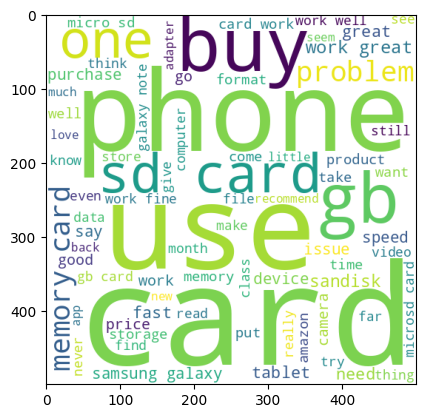

In [211]:
plt.imshow(reviews_text_wc)
plt.show()

In [212]:
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,transform_reviewText
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544,update lovely wife buy samsung galaxy tab fath...
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519,test dozens sdhc card one disturb trend notice...
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139,note please read last update scroll bottom lea...
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577,card get hot enough painful defective need con...
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109,sandisk announcement first gb micro sd take in...


## **Model building**




In [213]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
df[['polarity','subjectivity']] = df['transform_reviewText'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index,row in df['transform_reviewText'].items():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  if neg>pos:
    df.loc[index,'sentiment'] = 'Negative'
  elif pos>neg:
    df.loc[index,'sentiment'] ='Postive'
  else:
    df.loc[index, 'sentiment'] = 'Neutral'

In [214]:
df

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,transform_reviewText,polarity,subjectivity,sentiment
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544,update lovely wife buy samsung galaxy tab fath...,0.159795,0.572955,Postive
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519,test dozens sdhc card one disturb trend notice...,0.095857,0.572229,Postive
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139,note please read last update scroll bottom lea...,0.252773,0.534910,Postive
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577,card get hot enough painful defective need con...,0.157143,0.511600,Negative
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109,sandisk announcement first gb micro sd take in...,0.149286,0.507063,Postive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,G. Abbott,5,I use this in my Samsung Galaxy S5 to store my...,24-06-2014,167,0,0,0,0,0.000000,0.000000,use samsung galaxy store photos videos data st...,0.800000,0.750000,Postive
1711,G68,5,awesome! Worked well with the Surface 2 tablet...,04-08-2014,126,0,0,0,0,0.000000,0.000000,awesome work well surface later return surface...,0.500000,0.629630,Postive
1710,G0Horns!,4,Its amazing the amount of storage we are putti...,27-05-2013,560,0,0,0,0,0.000000,0.000000,amaze amount storage put micro chip days use d...,0.000000,0.000000,Postive
1709,g0estoeleven,3,This card does exactly what it should. Class-...,08-03-2013,640,0,0,0,0,0.000000,0.000000,card exactly performance fair price microsd fo...,0.268750,0.662500,Postive


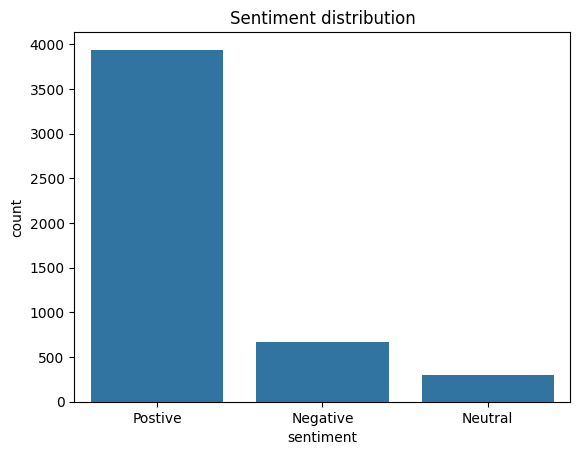

In [215]:
sns.countplot(x=df['sentiment'])
plt.title("Sentiment distribution")
plt.show()

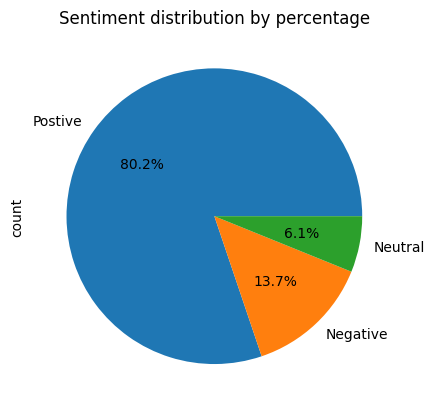

In [216]:
df['sentiment'].value_counts().plot(kind ='pie',autopct='%1.1f%%')
plt.title("Sentiment distribution by percentage")
plt.show()